In [25]:
#Необходимые библиотеки
import csv
from datetime import datetime
from tkinter import *
from tkinter import ttk
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk) 
import matplotlib.pyplot as plt

In [43]:
#Класс для хранения информации
class good:
    def __init__(self, information_string=''):
        data = self.informationFormat(information_string)
        
        if data:
            self.__correctness = True
            self.__orderNumber = data[0]
            self.__orderDate = data[1]
            self.__itemName = data[2]
            self.__itemCategory = data[3]
            self.__salesNumber = data[4]
            self.__itemPrice = data[5]
            self.__totalCost = data[6]
        else:
            self.__correctness = False
            self.__orderNumber = 0
            self.__orderDate = datetime.today()
            self.__itemName = ''
            self.__itemCategory = ''
            self.__salesNumber = 0
            self.__itemPrice = 0
            self.__totalCost = 0

    
    def informationFormat(self, information_string):
        information_list = information_string.split(';')
        formatted_data = []

        if len(information_list) != 7:
            return False

        #orderNumber
        if not information_list[0].isdigit():
            return False
        else:
            formatted_data.append(int(information_list[0]))

        #orderDate
        try:
            formatted_data.append(datetime.strptime(information_list[1], '%Y-%m-%d'))
        except ValueError:
            return False

        #itemName
        formatted_data.append(information_list[2])

        #itemCategory
        formatted_data.append(information_list[3])

        #salesNumber
        try:
            formatted_data.append(int(information_list[4]))
        except ValueError:
            return False

        #itemPrice
        try:
            formatted_data.append(float(information_list[5]))
        except ValueError:
            return False

        #totalCost
        try:
            formatted_data.append(float(information_list[6]))
        except ValueError:
            return False
            
        return formatted_data

    def getOrderNumber(self):
        return self.__orderNumber
    def getOrderDate(self):
        return self.__orderDate
    def getItemName(self):
        return self.__itemName
    def getItemCategory(self):
        return self.__itemCategory
    def getSalesNumber(self):
        return self.__salesNumber
    def getItemPrice(self):
        return self.__itemPrice
    def getTotalCost(self):
        return self.__totalCost
    def getCorrectness(self):
        return self.__correctness

In [44]:
#чтение из файла
goods_list = []
goods_dictionary = {}
goods_amount = {}

flag = False
with open('goods.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        item = good(row[0])
        if item.getCorrectness():
            goods_list.append(item)
            if item.getItemName() in goods_dictionary:
                goods_dictionary[item.getItemName()].append(item)
                goods_amount[item.getItemName()] += item.getSalesNumber()
            else:
                goods_dictionary[item.getItemName()] = [item]
                goods_amount[item.getItemName()] = item.getSalesNumber()
        else:
            print('error: wrong data',)

error: wrong data


In [45]:
#Поиск самого продаваемого товара
def bestSellingProduct(dictionary):
    current_dictionary = {}
    for i in dictionary:
        for item in dictionary[i]:
            if item.getItemName() in current_dictionary:
                current_dictionary[item.getItemName()] += item.getSalesNumber()
            else:
                current_dictionary[item.getItemName()] = item.getSalesNumber()
    max_number = 0
    max_name = ''
    for i in current_dictionary:
        if current_dictionary[i] > max_number:
            max_number = current_dictionary[i]
            max_name = i
    return (max_name, max_number)

In [46]:
#Поиск самого прибыльного товара
def mostProfitableProduct(dictionary):
    current_dictionary = {}
    for i in dictionary:
        for item in dictionary[i]:
            if item.getItemName() in current_dictionary:
                current_dictionary[item.getItemName()] += item.getTotalCost()
            else:
                current_dictionary[item.getItemName()] = item.getTotalCost()
    max_cost = 0
    max_name = ''
    for i in current_dictionary:
        if current_dictionary[i] > max_cost:
            max_cost = current_dictionary[i]
            max_name = i
    return (max_name, max_cost)

In [47]:
#Суммарная прибыль
def totalIncome():
    total_income = 0
    for i in goods_list:
        total_income += i.getTotalCost()
    return total_income

(-1.25, 1.25, -1.25, 1.25)

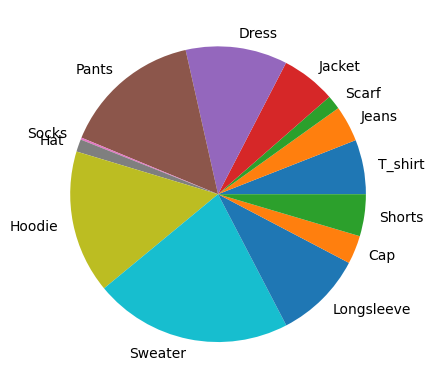

In [48]:
#Создание диаграммы Доля каждого товара в общей выручке
values = []
labels = []
total_income = totalIncome()
for i in goods_amount:
    labels.append(i)
    val = goods_amount[i] * goods_dictionary[i][0].getItemPrice()
    values.append(val / total_income * 100)
fig, ax = plt.subplots()
ax.pie(values, labels=labels)
ax.axis()

In [57]:
#Вывод данных в консоль
if len(goods_list):
    print("Итоговая выручка", totalIncome())
    print("Самый продаваемый товар", bestSellingProduct(goods_dictionary))
    print("Самый прибыльный товар",mostProfitableProduct(goods_dictionary))
    for i in goods_amount:
        print(i, "был продан", goods_amount[i], "раз")

Итоговая выручка 39051664.0
Самый продаваемый товар ('Cap', 1715)
Самый прибыльный товар ('Longsleeve', 9123800.0)
T_shirt был продан 1316 раз
Jeans был продан 407 раз
Scarf был продан 1283 раз
Jacket был продан 395 раз
Dress был продан 1053 раз
Pants был продан 1121 раз
Socks был продан 612 раз
Hat был продан 823 раз
Hoodie был продан 1152 раз
Sweater был продан 1195 раз
Longsleeve был продан 1526 раз
Cap был продан 1715 раз
Shorts был продан 759 раз


In [60]:
import random
def quickSort(mas):
   if len(mas) <= 1:
       return mas
   else:
       q = random.choice(mas)
       a_mas = []
       b_mas = []
       c_mas = []
       for n in mas:
           if n[0] < q[0]:
               a_mas.append(n)
           elif n[0] > q[0]:
               b_mas.append(n)
           else:
               c_mas.append(n)
       return quickSort(a_mas) + c_mas + quickSort(b_mas)

sorted = []

for i in goods_amount:
    sorted.append((goods_amount[i], i))
print(sorted)
sorted = quickSort(sorted)
print(sorted)

[(1316, 'T_shirt'), (407, 'Jeans'), (1283, 'Scarf'), (395, 'Jacket'), (1053, 'Dress'), (1121, 'Pants'), (612, 'Socks'), (823, 'Hat'), (1152, 'Hoodie'), (1195, 'Sweater'), (1526, 'Longsleeve'), (1715, 'Cap'), (759, 'Shorts')]
[(395, 'Jacket'), (407, 'Jeans'), (612, 'Socks'), (759, 'Shorts'), (823, 'Hat'), (1053, 'Dress'), (1121, 'Pants'), (1152, 'Hoodie'), (1195, 'Sweater'), (1283, 'Scarf'), (1316, 'T_shirt'), (1526, 'Longsleeve'), (1715, 'Cap')]


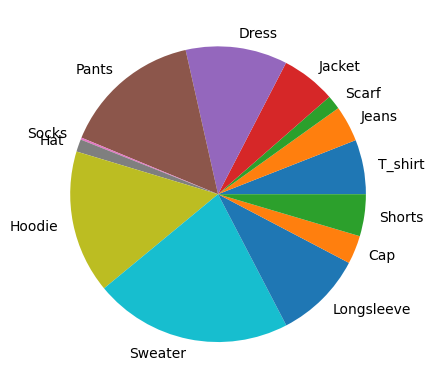

In [61]:
rootWindow = Tk()
rootWindow.title('Курсовая работа СиАОД')
rootWindow.geometry("350x220+500+500")
rootWindow.resizable(False, False)

#данные о студенте
def dataButtonClick():
    informationWindow = Toplevel(rootWindow)
    informationWindow.title('Данные')
    informationWindow.geometry("390x200+515+500")
    label1 = ttk.Label(informationWindow, text="Курсовая работа на тему:")
    label2 = ttk.Label(informationWindow, text="Разработка системы учёта и анализа продаж товаров в магазине")
    label3 = ttk.Label(informationWindow, text="с использованием инструментов программирования\n")
    label4 = ttk.Label(informationWindow, text="Выполнила студентка группы БФИ2204\nШрейдер Анита Сергеевна\n")
    label1.pack(anchor="center")
    label2.pack(anchor="center")
    label3.pack(anchor="center")
    label4.pack(anchor="center")

style = ttk.Style()
style.configure('Info.TButton', foreground='blue', font=('Arial', 10))
info_button = ttk.Button(text="Данные", width=10, style='Info.TButton', command=dataButtonClick)
info_button.grid(row=10, column=0, padx=4, pady=4, sticky="nsew")

#общая выручка
def totalIncomeButtonClick():
    totalIncomeWindow = Toplevel(rootWindow)
    totalIncomeWindow.title('Общая выручка')
    totalIncomeWindow.geometry("270x200+515+500")
    label1 = ttk.Label(totalIncomeWindow, text=f"")
    label2 = ttk.Label(totalIncomeWindow, text=f"Общая выручка составила\n")
    label3 = ttk.Label(totalIncomeWindow, text=f"{totalIncome()} рублей")
    label1.pack()
    label2.pack()
    label3.pack()

total_income_label = ttk.Label(text="Общая выручка", width = 0)
total_income_button = ttk.Button(text="Показать", width = 0, command=totalIncomeButtonClick)
total_income_label.grid(column = 0, row = 1, padx=10, pady=10)
total_income_button.grid(column = 1, row = 1, ipadx=8, ipady=8)


#Самый продаваемый товар
def thebestSellingProductButtonClick():
    bestSellingProductWindow = Toplevel(rootWindow)
    bestSellingProductWindow.title('Самый продаваемый товар')
    bestSellingProductWindow.geometry("270x200+515+500")
    k = bestSellingProduct(goods_dictionary)
    label1 = ttk.Label(bestSellingProductWindow, text=f"")
    label2 = ttk.Label(bestSellingProductWindow, text="Самым продаваемым товаром является:")
    label3 = ttk.Label(bestSellingProductWindow, text=f"{k[0]}\n")
    label4 = ttk.Label(bestSellingProductWindow, text="Его купили")
    label5 = ttk.Label(bestSellingProductWindow, text=f"{k[1]} раз")
    label1.pack()
    label2.pack()
    label3.pack()
    label4.pack()
    label5.pack()

most_popular_good_label = ttk.Label(text="Самый продаваемый товар", width = 0, foreground='blue')
most_popular_good_button = ttk.Button(text="Показать", width = 0, command=thebestSellingProductButtonClick)
most_popular_good_label.grid(column = 0, row = 2, padx=10, pady=10)
most_popular_good_button.grid(column = 1, row = 2, ipadx=8, ipady=8)


#Самый прибыльный товар
def mostprofitableProductButtonClick():
    mostProfitableProductWindow = Toplevel(rootWindow)
    mostProfitableProductWindow.title('Самый прибыльный товар')
    mostProfitableProductWindow.geometry("270x200+515+500")
    k = mostProfitableProduct(goods_dictionary)
    label1 = ttk.Label(mostProfitableProductWindow, text=f"")
    label2 = ttk.Label(mostProfitableProductWindow, text="Самым прибыльным товаром является:")
    label3 = ttk.Label(mostProfitableProductWindow, text=f"{k[0]}\n")
    label4 = ttk.Label(mostProfitableProductWindow, text="Он принёс")
    label5 = ttk.Label(mostProfitableProductWindow, text=f"{k[1]} рублей")
    label1.pack()
    label2.pack()
    label3.pack()
    label4.pack()
    label5.pack()

most_profitable_product_label = ttk.Label(text="Самый прибыльный товар", width = 0, foreground='blue')
most_profitable_product_button = ttk.Button(text="Показать", width = 0, command=mostprofitableProductButtonClick)
most_profitable_product_label.grid(column = 0, row = 3, padx=10, pady=10)
most_profitable_product_button.grid(column = 1, row = 3, ipadx=8, ipady=8)

#Итоговые данные
def finalReportButtonClick():
    finalReportWindow = Toplevel(rootWindow)
    finalReportWindow.title('Итоговые данные')
    label1 = ttk.Label(finalReportWindow, text=f"")
    label2 = ttk.Label(finalReportWindow, text=f"Итоговая выручка составила:")
    label3 = ttk.Label(finalReportWindow, text=f"{totalIncome()} рублей")
    label1.pack()
    label2.pack()
    label3.pack()
    
    global values
    global labels
    total_income = totalIncome()
    fig, ax = plt.subplots()
    ax.pie(values, labels=labels)
    canvas = FigureCanvasTkAgg(fig, master = finalReportWindow)   
    canvas.draw() 
    canvas.get_tk_widget().pack()

    listbox = Listbox(finalReportWindow)
    listbox.pack(side=LEFT, fill=BOTH, expand=1)
    for i in goods_amount:
        listbox.insert(END, (i + " был продан " + str(goods_amount[i]) + " раз")) 

    scrollbar = ttk.Scrollbar(finalReportWindow, orient="vertical", command=listbox.yview)
    scrollbar.pack(side=RIGHT, fill=Y)
      
    listbox["yscrollcommand"]=scrollbar.set

final_report_label = ttk.Label(text="Итоговые данные", width = 0)
final_report_button = ttk.Button(text="Показать", width = 0, command=finalReportButtonClick)
final_report_label.grid(column = 0, row = 4, padx=10, pady=10)
final_report_button.grid(column = 1, row = 4, ipadx=8, ipady=8)
rootWindow.mainloop()